## Fit T1 mapping data

In [14]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import t1_fit
sys.path.append('..')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
### Variable flip angle mapping (2 x flip angles)
Depends on signal-flip angle relationship:

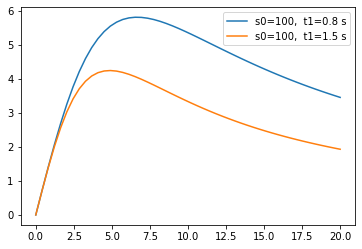

In [26]:
fa_range = np.linspace(0, 20, 50)
s_range_1 = t1_fit.spgr_signal(s0=100,  t1=0.8, tr=5.4e-3, fa=fa_range)
s_range_2 = t1_fit.spgr_signal(s0=100,  t1=1.5, tr=5.4e-3, fa=fa_range)
plt.plot(fa_range, s_range_1, '-', label='s0=100,  t1=0.8 s')
plt.plot(fa_range, s_range_2, '-', label='s0=100,  t1=1.5 s')
plt.legend();

Take one voxel of data based on 2 x SPGR acquisitions.
Estimating T1 from 2 x flip angles is the fastest but least accurate method.

29.1 µs ± 1.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Fitted values: s0 = 13531.9, t1 = 1.326 s


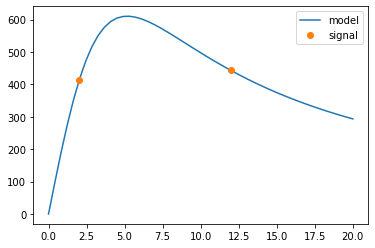

In [40]:
# Fit data:
s = np.array([413, 445])
tr = 5.4e-3
fa = np.array([2, 12])
%timeit s0, t1 = t1_fit.fit_vfa_2_point(s, fa, tr)

# Plot data:
print(f"Fitted values: s0 = {s0:.1f}, t1 = {t1:.3f} s")
plt.plot(fa_range, t1_fit.spgr_signal(s0=s0,  t1=t1, tr=tr, fa=fa_range), '-', label='model')
plt.plot(fa, s, 'o', label='signal')
plt.legend();

### Variable flip angle (based on 3 x flip angles)
Fit using the **linear** method (moderately fast, moderately accurate):

42.9 µs ± 831 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Fitted values: s0 = 13531.9, t1 = 1.326 s


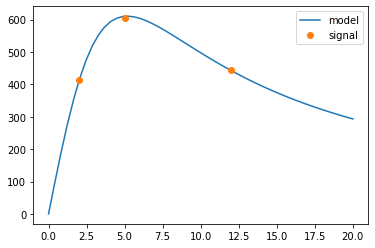

In [39]:
# Fit data:
s = np.array([413, 604, 445])
tr = 5.4e-3
fa = np.array([2, 5, 12])
%timeit s0, t1 = t1_fit.fit_vfa_linear(s, fa, tr)

# Plot data:
print(f"Fitted values: s0 = {s0:.1f}, t1 = {t1:.3f} s")
plt.plot(fa_range, t1_fit.spgr_signal(s0=s0,  t1=t1, tr=tr, fa=fa_range), '-', label='model')
plt.plot(fa, s, 'o', label='signal')
plt.legend();

Now fit using the **non-linear** method (slowest, most accurate):

1.43 ms ± 41.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Fitted values: s0 = 13531.9, t1 = 1.326 s


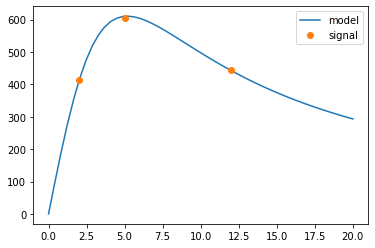

In [41]:
# Fit data:
s = np.array([413, 604, 445])
tr = 5.4e-3
fa = np.array([2, 5, 12])
%timeit s0, t1 = t1_fit.fit_vfa_nonlinear(s, fa, tr)

# Plot data:
print(f"Fitted values: s0 = {s0:.1f}, t1 = {t1:.3f} s")
plt.plot(fa_range, t1_fit.spgr_signal(s0=s0,  t1=t1, tr=tr, fa=fa_range), '-', label='model')
plt.plot(fa, s, 'o', label='signal')
plt.legend();

### T1 estimation using DESPOT1-HIFI
T1 can be estimated based on a combination of SPGR and IR-SPGR acquisitions. This technique also estimates the relative flip angle k_fa (nominal/actual FA).  Now add 2 x IR-SPGR acquisitions to the previous 3 x SPGR scans. We now have 5 x acquisitions. All parameters are specified for each acquisition.

3.07 ms ± 93.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Fitted values: s0 = 11856.2, t1 = 1.022 s, k_fa = 1.138


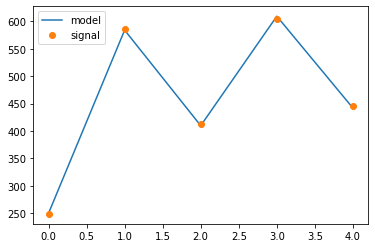

In [55]:
# Fit data:
s = np.array([249, 585, 413, 604, 445]) # signal
esp = np.tile(5.4e-3, 5) # echo spacing (IR-SPGR) or TR (SPGR)
ti = np.array([0.1680, 1.0680, np.nan, np.nan, np.nan]) # delay after inversion pulse
n = np.array([160, 160, np.nan, np.nan, np.nan]) # number of readout pulses (IR-SPGR only)
b = np.array([5, 5, 2, 5, 12]) # excitation flip angle
td = np.array([0, 0, np.nan, np.nan, np.nan]) # delay between end of readout train and next inversion pulse (IR-SPGR only)
centre = np.array([0.5, 0.5, np.nan, np.nan, np.nan]) # time when centre of k-space is acquired (expressed as fraction of readout pulse train length; IR-SPGR only)
%timeit t1, s0, k_fa, s_fit = t1_fit.fit_hifi(s, esp, ti, n, b, td, centre)

# Plot data:
print(f"Fitted values: s0 = {s0:.1f}, t1 = {t1:.3f} s, k_fa = {k_fa:.3f}")
plt.plot(np.arange(5), s_fit, '-', label='model')
plt.plot(np.arange(5), s, 'o', label='signal')
plt.legend();

---
### Reference values
Obtained from fitting DESPOT1-HIFI signal in Matlab:
T1 = 1.0218
s0 = 11856
k = 1.1379
(data from: INV_ED_004, FSLEyes coordinates 98,99,106)